### df[["","city",""]]=df["Purchase Address"].str.split(",",expand=True)

In [1]:
import pandas as pd
#pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_csv('Sales_December_2019.csv')

In [3]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25117 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          25037 non-null  object
 1   Product           25037 non-null  object
 2   Quantity Ordered  25037 non-null  object
 3   Price Each        25037 non-null  object
 4   Order Date        25037 non-null  object
 5   Purchase Address  25037 non-null  object
dtypes: object(6)
memory usage: 1.1+ MB


In [134]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [135]:
df.isnull().sum().sum()/len(df)

0.01911056256718557

# dropped nan values as there are very less

In [136]:
df.dropna(inplace=True)

In [137]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


# Qs 1. What was the best month for sales? How much was earned that month?

In [138]:
df["Quantity Ordered"].unique()

array(['1', '2', '4', '3', 'Quantity Ordered', '7', '5', '6'],
      dtype=object)

In [139]:
df=df[df["Quantity Ordered"]!="Quantity Ordered"]

In [140]:
df["Quantity Ordered"]=df["Quantity Ordered"].astype(float, copy=True)
df["Price Each"]=df["Price Each"].astype(float, copy=True)

In [141]:
df.dtypes

Order ID             object
Product              object
Quantity Ordered    float64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

In [142]:
df["Sales"]=df["Quantity Ordered"]*df["Price Each"]

In [143]:
df["Order Date"]=pd.to_datetime(df["Order Date"])

In [145]:
df.dtypes

Order ID                    object
Product                     object
Quantity Ordered           float64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Sales                      float64
dtype: object

In [149]:
df["month"]=df["Order Date"].dt.month

In [150]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,month
0,295665,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",1700.00,12
1,295666,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",600.00,12
2,295667,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",11.95,12
3,295668,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",149.99,12
4,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",11.95,12
...,...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1.0,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",14.95,12
25113,319667,AA Batteries (4-pack),2.0,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",7.68,12
25114,319668,Vareebadd Phone,1.0,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",400.00,12
25115,319669,Wired Headphones,1.0,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",11.99,12


<AxesSubplot:xlabel='month'>

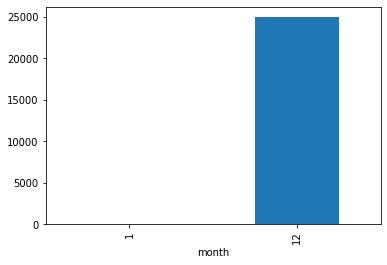

In [157]:
df.groupby("month")["Sales"].count().plot(kind="bar")

# Which city has the highest no of sales

In [188]:
df[["","city",""]]=df["Purchase Address"].str.split(",",expand=True)

In [206]:
la=df.groupby("city").Sales.sum().sort_values(ascending=False).head(1)

In [207]:
la=la.to_frame()

In [209]:
 type(la)

pandas.core.frame.DataFrame

<AxesSubplot:xlabel='Product'>

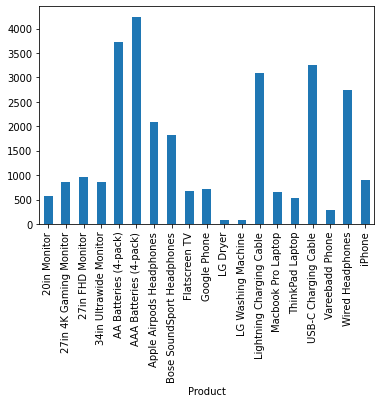

In [218]:
df.groupby(["Product"])["Quantity Ordered"].sum().plot(kind="bar")

# Which time does buyer bought mostly

In [219]:
df["time"]=df["Order Date"].dt.time

In [221]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,month,,city,time
0,295665,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",1700.00,12,NY 10001,New York City,00:01:00
1,295666,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",600.00,12,NY 10001,New York City,07:03:00
2,295667,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",11.95,12,NY 10001,New York City,18:21:00
3,295668,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",149.99,12,CA 94016,San Francisco,15:13:00
4,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",11.95,12,GA 30301,Atlanta,12:38:00


<AxesSubplot:xlabel='time'>

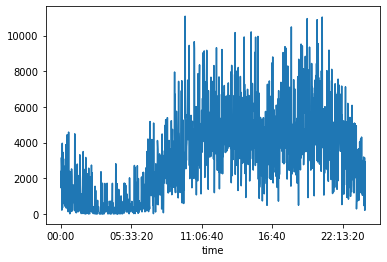

In [224]:
df.groupby("time")["Sales"].sum().sort_values(ascending=False).plot()